<a href="https://colab.research.google.com/github/sehab1611251/NLP-Project/blob/main/NLP_Project_(Assasin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Data Processing.

In [ ]:
# Download the set of stop words the first time
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') #needed for lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Step 1: Load the dataset
data = pd.read_csv('/content/spam_assassin.csv', usecols=['text', 'target'])
data.dropna(subset=['text'], inplace=True)  # drop missing value columns (in this dataset we have roughly 30 missing values)

In [ ]:
# Count of data points before filtering
total_data_before = len(data)
total_data_before

5826

In [ ]:
# Filter the data
data = data[data['target'].isin(['0', '1'])]

In [ ]:
# Count of dropped data points
dropped_data_count = total_data_before - len(data)

In [ ]:
dropped_data_count

39

In [ ]:
# Get the list of stop words in English
stop_words = set(stopwords.words('english'))

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
data

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0
...,...,...
5851,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5852,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5853,Received: from hq.pro-ns.net (localhost [127.0...,1
5854,From razor-users-admin@lists.sourceforge.net T...,0


In [ ]:
#Store labels
labels = data['target']

In [ ]:
# Access the text column
text_data = data['text']

In [ ]:
print(text_data.dtypes)

object


In [ ]:
text_data

0       From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...
1       From gort44@excite.com Mon Jun 24 17:54:21 200...
2       From fork-admin@xent.com Mon Jul 29 11:39:57 2...
3       From dcm123@btamail.net.cn Mon Jun 24 17:49:23...
4       From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...
                              ...                        
5851    From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...
5852    From fork-admin@xent.com Mon Oct 7 20:37:02 20...
5853    Received: from hq.pro-ns.net (localhost [127.0...
5854    From razor-users-admin@lists.sourceforge.net T...
5855    From rssfeeds@jmason.org Mon Sep 30 13:44:10 2...
Name: text, Length: 5787, dtype: object

In [ ]:
# Convert the labels to integer format
data['target'] = data['target'].astype(int)

In [ ]:
# Separate labels and text data
labels = data['target']
text_data = data['text']

In [ ]:
print(text_data)

0       From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...
1       From gort44@excite.com Mon Jun 24 17:54:21 200...
2       From fork-admin@xent.com Mon Jul 29 11:39:57 2...
3       From dcm123@btamail.net.cn Mon Jun 24 17:49:23...
4       From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...
                              ...                        
5851    From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...
5852    From fork-admin@xent.com Mon Oct 7 20:37:02 20...
5853    Received: from hq.pro-ns.net (localhost [127.0...
5854    From razor-users-admin@lists.sourceforge.net T...
5855    From rssfeeds@jmason.org Mon Sep 30 13:44:10 2...
Name: text, Length: 5787, dtype: object


In [ ]:
# Lowercase all text data
text_data = [text.lower() for text in text_data]

In [ ]:
#Find the number of unique words
#Remove stop words and perform lemmatization
text_data = [' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words) for text in text_data]
# Combine all the text data
all_text = ' '.join(text_data)
# Tokenize the text data
all_words = all_text.split(' ')
# Get the number of unique words
num_unique_words = len(set(all_words))
print(f"Number of unique words: {num_unique_words}")

Number of unique words: 151660


In [ ]:
from collections import Counter
import numpy as np

# Count the frequency of each word
word_counts = Counter(all_words)
# Sort the words by frequency (from high to low)
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# Calculate the cumulative sum of word frequencies
cumulative_word_counts = np.cumsum([count for word, count in sorted_word_counts])
# Calculate the total number of word occurrences
total_word_count = cumulative_word_counts[-1]

# Find the smallest number of most frequent words that make up at least 95% of the total word occurrences
num_words_95_percent = next(i for i, cumulative_count in enumerate(cumulative_word_counts) if cumulative_count >= total_word_count * 0.95)

print(f"Number of words for 95% coverage: {num_words_95_percent}")


Number of words for 95% coverage: 23226


In [ ]:
#Tokenize the text data
tokenizer = Tokenizer(num_words=num_words_95_percent)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

In [ ]:
# Get the vocabulary size from the tokenizer
vocab_size = len(tokenizer.word_index) + 1  # Consider padding index (0)

In [ ]:
vocab_size

108408

In [ ]:
#Find maximum length of a sequence
# Calculate the length of each sequence
sequence_lengths = [len(sequence) for sequence in sequences]
# Find the maximum length
max_len = max(sequence_lengths)
print(f"Maximum length: {max_len}") # Adjustable hyperparameter

Maximum length: 7924


In [ ]:
# Find the length that covers 95% of the sequences
max_len_95_percent = int(np.percentile(sequence_lengths, 95))
print(f"Length for 95% coverage: {max_len_95_percent}")

Length for 95% coverage: 1381


In [ ]:
# 4. Pad sequences with zeros to ensure a fixed length (e.g., max_len)
padded_sequences = pad_sequences(sequences, maxlen=max_len_95_percent, padding='post')

In [ ]:
len(padded_sequences[0])

1381

In [ ]:
# Split the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)  # Split into temp and test sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # Split temp set into training and validation sets

In [ ]:
# This section returns the processed data ready for model
processed_data = (X_train, X_val, X_test, y_train, y_val, y_test, vocab_size)

In [ ]:
processed_data

(array([[  19,   39,   22, ...,    0,    0,    0],
        [  54,   15,   39, ...,    0,    0,    0],
        [  75,   77,   39, ...,    0,    0,    0],
        ...,
        [  19,   39,   22, ...,    0,    0,    0],
        [ 695, 2101,  322, ...,   59,   76,   19],
        [  19,   39,   22, ...,    0,    0,    0]], dtype=int32),
 array([[  129,  4178,    37, ...,     0,     0,     0],
        [17574,  2210,     2, ...,     0,     0,     0],
        [   54,    15,    39, ...,     0,     0,     0],
        ...,
        [   19,    39,    22, ...,     0,     0,     0],
        [   11,    36,     3, ..., 23116, 23117, 23118],
        [  673,  4540,  4922, ...,     0,     0,     0]], dtype=int32),
 array([[   63,    39,    41, ...,     0,     0,     0],
        [  372,     2,   207, ...,     0,     0,     0],
        [   63,    39,    41, ...,     0,     0,     0],
        ...,
        [   75,   194,    39, ...,     0,     0,     0],
        [    2,    60,   311, ...,     0,     0,     0]

# Model Building.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Get the processed data from Data Processing Step
X_train, X_val, X_test, y_train, y_val, y_test, vocab_size = processed_data

In [ ]:
# Define the model
embed_dim = 64  # Embedding dimension
rnn_units = 128 # Number of units in LSTM layers
batch_size = 32  # Batch size for training
learning_rate = 0.0001  # Learning rate
dropout_rate = 0.5  # Dropout rate
l2_reg = 0.01  # L2 regularization rate

In [ ]:
inputs = Input(shape=(max_len_95_percent,), dtype=tf.int32)

In [ ]:
#Embedding layer to convert word indices to vectors
embeddings = Embedding(vocab_size, embed_dim)(inputs)

In [ ]:
#Bi-directional LSTM layer for processing sequences
x = Bidirectional(LSTM(rnn_units, return_sequences=True, kernel_regularizer=l2(l2_reg)))(embeddings)  # Added L2 regularization
x = Dropout(dropout_rate)(x)  # Added dropout

In [ ]:
#Attention layer
def scaled_dot_product_attention(queries, keys, values):
  """Scaled Dot-Product Attention Layer."""
  scores = tf.matmul(queries, keys, transpose_b=True) / tf.sqrt(tf.cast(tf.shape(keys)[-1], tf.float32)) #Calculates query, key, and value representations and computes Attention scores using dot product
  weights = tf.nn.softmax(scores, axis=-1) #Applies softmax to obtain attention weights
  output = tf.matmul(weights, values) # Calculates a weighted average of values based on attention weights
  return output

In [ ]:
attention_output = scaled_dot_product_attention(x, x, x)  # Apply attention

In [ ]:
#Global average pooling
x = GlobalAveragePooling1D()(attention_output)  # Pool after attention

In [ ]:
#Dense layer for output with sigmoid activation for binary classification
outputs = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1381)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1381, 64)             6938112   ['input_1[0][0]']             
                                                                                                  
 bidirectional (Bidirection  (None, 1381, 256)            197632    ['embedding[0][0]']           
 al)                                                                                              
                                                                                                  
 dropout (Dropout)           (None, 1381, 256)            0         ['bidirectional[0][0]']   

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()]
)

In [ ]:
#Train the Model (with Early Stopping)
early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=8) # Monitor validation accuracy


In [ ]:
# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/100
109/109 [==============================] - 43s 328ms/step - loss: 2.5831 - binary_accuracy: 0.6534 - val_loss: 2.2331 - val_binary_accuracy: 0.6857
Epoch 2/100
109/109 [==============================] - 35s 318ms/step - loss: 1.9392 - binary_accuracy: 0.7433 - val_loss: 1.4495 - val_binary_accuracy: 0.9223
Epoch 3/100
109/109 [==============================] - 32s 293ms/step - loss: 1.2629 - binary_accuracy: 0.9196 - val_loss: 1.0514 - val_binary_accuracy: 0.9473
Epoch 4/100
109/109 [==============================] - 30s 276ms/step - loss: 0.9186 - binary_accuracy: 0.9349 - val_loss: 0.7862 - val_binary_accuracy: 0.9499
Epoch 5/100
109/109 [==============================] - 30s 279ms/step - loss: 0.6669 - binary_accuracy: 0.9553 - val_loss: 0.6065 - val_binary_accuracy: 0.9439
Epoch 6/100
109/109 [==============================] - 27s 253ms/step - loss: 0.5328 - binary_accuracy: 0.9398 - val_loss: 0.4540 - val_binary_accuracy: 0.9629
Epoch 7/100
109/109 [===================

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test loss:', loss, 'Test accuracy:', accuracy)

37/37 [==============================] - 2s 58ms/step - loss: 0.1326 - binary_accuracy: 0.9801
Test loss: 0.13256385922431946 Test accuracy: 0.9801381826400757


In [ ]:
# Get model predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Round and convert to int for binary classification

37/37 [==============================] - 3s 54ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[786   3]
 [ 20 349]]


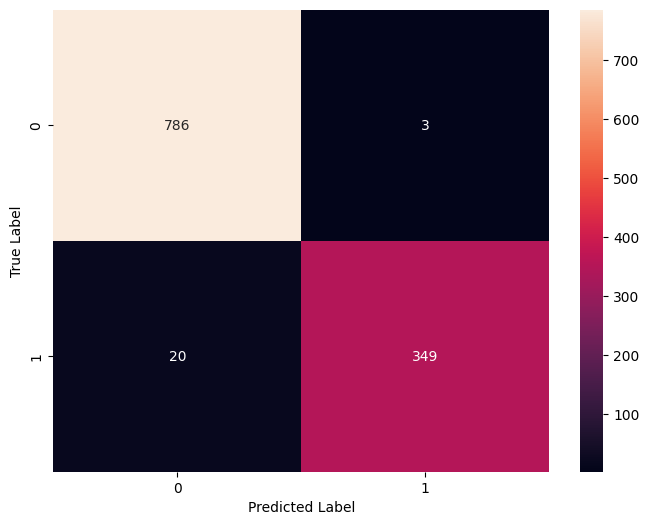

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9914772727272727
Recall: 0.94579945799458
F1 Score: 0.9680998613037449


In [ ]:
# Check the shape of X_test
print(f"Shape of X_test: {X_test.shape}")

# Generate predictions
y_pred = model.predict(X_test)

# Check the shape of y_pred
print(f"Shape of y_pred: {y_pred.shape}")


Shape of X_test: (1158, 1381)
37/37 [==============================] - 2s 57ms/step
Shape of y_pred: (1158, 1)


In [ ]:
# Flatten y_pred to have the same shape as y_test
y_pred = y_pred.flatten()

In [ ]:
y_pred.size

1158

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.9959469810160713


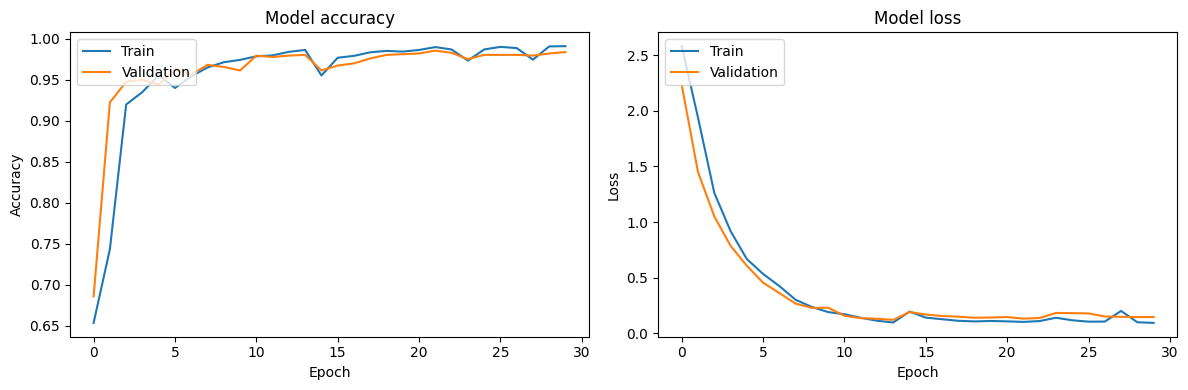

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Ablation Study in terms of Hyperparameter Sensitivity and Regularization Impact

In [ ]:
# Define the model
embed_dim = 128  # Embedding dimension
rnn_units = 256 # Number of units in LSTM layers
batch_size = 16  # Batch size for training
learning_rate = 0.0001  # Learning rate

In [ ]:
inputs = Input(shape=(max_len_95_percent,), dtype=tf.int32)

In [ ]:
#Embedding layer to convert word indices to vectors
embeddings = Embedding(vocab_size, embed_dim)(inputs)

In [ ]:
#Bi-directional LSTM layer for processing sequences (without Regularization and Dropout)
x = Bidirectional(LSTM(rnn_units, return_sequences=True))(embeddings)

In [ ]:
# 7. Attention layer
def scaled_dot_product_attention(queries, keys, values):
  """Scaled Dot-Product Attention Layer."""
  scores = tf.matmul(queries, keys, transpose_b=True) / tf.sqrt(tf.cast(tf.shape(keys)[-1], tf.float32))
  weights = tf.nn.softmax(scores, axis=-1)
  output = tf.matmul(weights, values)
  return output

In [ ]:
attention_output = scaled_dot_product_attention(x, x, x)  # Apply attention

In [ ]:
#Global average pooling
x = GlobalAveragePooling1D()(attention_output)  # Pool after attention

In [ ]:
#Dense layer for output with sigmoid activation for binary classification
outputs = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1381)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 1381, 128)            1387622   ['input_2[0][0]']             
                                                          4                                       
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 1381, 512)            788480    ['embedding_1[0][0]']         
 onal)                                                                                            
                                                                                              

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()]
)

In [ ]:
#Train the Model
early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=8)

In [ ]:
# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/100
217/217 [==============================] - 69s 270ms/step - loss: 0.4977 - binary_accuracy: 0.7724 - val_loss: 0.1884 - val_binary_accuracy: 0.9456
Epoch 2/100
217/217 [==============================] - 54s 251ms/step - loss: 0.1631 - binary_accuracy: 0.9470 - val_loss: 0.1202 - val_binary_accuracy: 0.9585
Epoch 3/100
217/217 [==============================] - 52s 240ms/step - loss: 0.1012 - binary_accuracy: 0.9602 - val_loss: 0.1009 - val_binary_accuracy: 0.9620
Epoch 4/100
217/217 [==============================] - 50s 230ms/step - loss: 0.0716 - binary_accuracy: 0.9732 - val_loss: 0.0728 - val_binary_accuracy: 0.9750
Epoch 5/100
217/217 [==============================] - 48s 223ms/step - loss: 0.0613 - binary_accuracy: 0.9775 - val_loss: 0.0659 - val_binary_accuracy: 0.9741
Epoch 6/100
217/217 [==============================] - 48s 219ms/step - loss: 0.0406 - binary_accuracy: 0.9853 - val_loss: 0.0674 - val_binary_accuracy: 0.9810
Epoch 7/100
217/217 [===================

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test loss:', loss, 'Test accuracy:', accuracy)

73/73 [==============================] - 5s 73ms/step - loss: 0.0397 - binary_accuracy: 0.9922
Test loss: 0.039676252752542496 Test accuracy: 0.9922279715538025


In [ ]:
# Get model predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Round and convert to int for binary classification

37/37 [==============================] - 4s 99ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[789   0]
 [  9 360]]


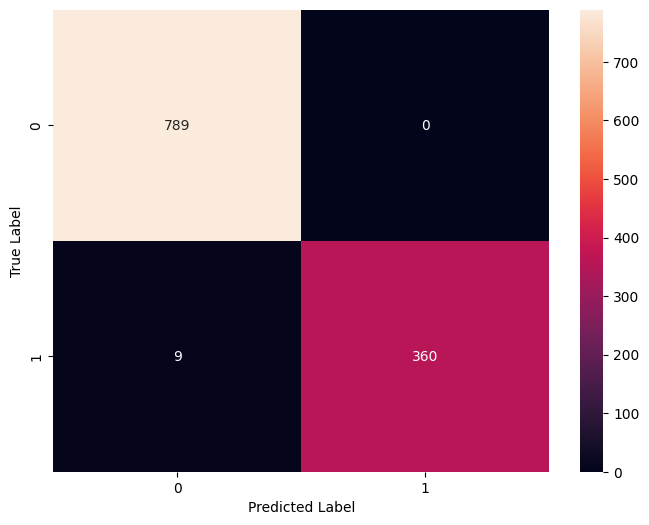

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 0.975609756097561
F1 Score: 0.9876543209876543


In [ ]:
# Check the shape of X_test
print(f"Shape of X_test: {X_test.shape}")

# Generate predictions
y_pred = model.predict(X_test)

# Check the shape of y_pred
print(f"Shape of y_pred: {y_pred.shape}")

Shape of X_test: (1158, 1381)
37/37 [==============================] - 4s 101ms/step
Shape of y_pred: (1158, 1)


In [ ]:
# Flatten y_pred to have the same shape as y_test
y_pred = y_pred.flatten()

In [ ]:
y_pred.size

1158

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.9953458976921835


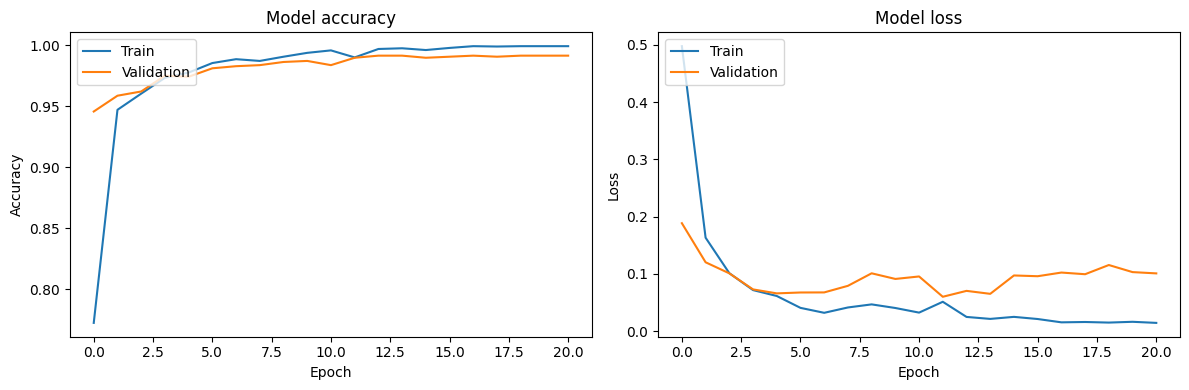

In [ ]:
# Plot training & validation accuracy values (assuming history object exists)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()